Assignment 8 - K-Nearest Neighbors

Tyler Gardner

11/3/2021

# Task 1

## Code Chunk 1 - Set up, Data import, and Preparation

In the first code chunk of this google colab notebook we start by importing the packages that are needed to run our code and analyze the data. The google drive is mounted to import and read the data. The data is then looked over and analyzed. The target variable is popped from the data set and encoded. The data set is then encoded as well so we can explore and analyze the data set.

In [19]:
# A. Data Import

# Import Packages Needed
import pandas as pd
import numpy as np
import sklearn 

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,\
recall_score, precision_score, f1_score, accuracy_score, make_scorer,\
precision_recall_fscore_support, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [20]:
# mount the google drive location to read the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Import data using pd.read_csv()
CD_additional_modified_raw = pd.read_csv("/content/drive/MyDrive/data_sets/CD_additional_modified.csv")
CD_additional_modified = CD_additional_modified_raw.copy()

In [22]:
# B. Show the overall structure and summary of the data frame using info(), describe(), head()

CD_additional_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [23]:
CD_additional_modified.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [24]:
CD_additional_modified.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [25]:
# C. pop() the target variable into a new variable ie y_target
y_target = CD_additional_modified.pop('y')

In [26]:
# C1. Encode the target variable using the following code: y_target = pd.get_dummies(y_target, drop_first = True)
y_target = pd.get_dummies(y_target,drop_first=True)

In [27]:
# D. Show the overall structure and summary of the data frame using info(), describe(), head()
CD_additional_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [28]:
CD_additional_modified.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [29]:
CD_additional_modified.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [30]:
# E. Encode the dataframe using pd.get_dummies()
CD_additional_modified_enc = pd.get_dummies(CD_additional_modified)

# Task 2

## Code Chunk 2 - Standardizing the Data

In code chunk 2 we use the standard scaler fit to standardize and transofrm the data. After this is done a scaled dataframe is shown.

In [31]:
# 1. Using the StandardScaler fit and transform the data
# 2. Show the scaled dataframe
pd.DataFrame(StandardScaler().fit_transform(CD_additional_modified_enc))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,-0.980752,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,-0.570715,1.912983,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,0.801056,-0.623489,-0.051747,-0.340969,-0.242068,2.485148,-0.536649,-0.015583,-0.386361,-0.665381,-0.205565,0.492477,-0.492097,-0.015583,-0.898097,-0.161736,0.945406,0.479499,-0.161736,-0.438783,0.743752,-0.743752,-0.234674,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
1,-0.107991,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,-0.570715,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,3.079110,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,-1.248353,1.603876,-0.051747,-0.340969,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,-0.205565,0.492477,-0.492097,-0.015583,1.113465,-0.161736,-1.057746,0.479499,-0.161736,-0.438783,-1.344534,1.344534,-0.234674,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.348463,-0.130526,-0.12563,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
2,-1.465619,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,-0.570715,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,3.079110,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,0.801056,-0.623489,-0.051747,-0.340969,-0.242068,-0.402391,1.863414,-0.015583,-0.386361,-0.665381,-0.205565,0.492477,-0.492097,-0.015583,-0.898097,-0.161736,0.945406,0.479499,-0.161736,-0.438783,-1.344534,1.344534,-0.234674,-0.427319,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,-0.478733,-0.511809,-0.513697,-0.506516,2.044782,-0.351958,0.411308,-0.188958
3,-0.204965,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,-0.570715,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,3.079110,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,0.801056,-0.623489,-0.051747,-0.340969,-0.242068,2.485148,-0.536649,-0.015583,-0.386361,-0.665381,-0.205565,0.492477,-0.492097,-0.015583,-0.898097,6.182926,-1.057746,-2.085510,6.182926,-0.438783,-1.344534,1.344534,-0.234674,-0.427319,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.348463,-0.130526,-0.12563,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
4,0.667795,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,1.752187,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,0.801056,-0.623489,-0.051747,-0.340969,-0.242068,-0.402391,-0.536649,-0.015583,-0.386361,1.502898,-0.205565,0.492477,-0.492097,-0.015583,-0.898097,-0.161736,0.945406,0.479499,-0.161736,-0.438783,0.743752,-0.743752,-0.234674,-0.427319,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,2.869743,-0.130526,-0.12563,-0.478733,1.953854,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,-0.980752,-0.800196,-0.598660,0.201031,-0.351356,0.841389,0.583995,-0.479079,0.771120,0.836535,1.752187,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,0.801056,-0.623489,-0.051747,-0.340969,4.131076,-0.402391,-0.536649,-0.015583,-0.386361,-0.665381,-0.205565,0.492477,-0.492097,-0.015583,-0.898097,-0.161736,0.945406,-2.085510,-0.161736,2.279032,0.743752,-0.743752,-0.234674,-0.427319,-0.073279,2.189349,-0

# Task 3

## Code Chunk 3 - GridSearchCV Dictionary to search Neighbors

In code chunk 3 the parameters are set to search neighbors options 1 through 10. The GridSearchCV is set for 3 fold cross validation to examine the f1 score. After all those are set a dataframe is printed of the GridSearchResults.

In [32]:
# 1. Prepare a GridSearchCV dictionary to search neighbors
    # 1. Search neighbors options 1 through 10 (ie. 1,2,3,4,5,6,7,8,9,10)
# 2 Use 3 fold cross validation in the gridsearchcv to examine f1 score
# 3. Create a dataframe fo the GridSearchResults
parameters = {'n_neighbors': [i for i in range(11)]}

clf = GridSearchCV(KNeighborsClassifier(), parameters,scoring='f1',cv=3).fit(CD_additional_modified_enc, y_target)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024443,0.005234,0.000000,0.000000,0,{'n_neighbors': 0},NaN,NaN,NaN,NaN,NaN,11
1,0.024158,0.002382,0.116509,0.004860,1,{'n_neighbors': 1},0.479452,0.474916,0.488294,0.480888,0.005555,5
2,0.021367,0.001102,0.112406,0.004458,2,{'n_neighbors': 2},0.377880,0.363636,0.383929,0.375148,0.008506,10
3,0.020685,0.000206,0.120203,0.003703,3,{'n_neighbors': 3},0.501767,0.496183,0.503546,0.500499,0.003137,2
4,0.021000,0.000550,0.117137,0.002840,4,{'n_neighbors': 4},0.468619,0.398190,0.448980,0.438596,0.029675,8
5,0.020502,0.000178,0.118612,0.002328,5,{'n_neighbors': 5},0.487455,0.469697,0.512821,0.489991,0.017696,4
6,0.020904,0.000234,0.119784,0.002471,6,{'n_neighbors': 6},0.463415,0.403587,0.442553,0.436518,0.024794,9
7,0.020994,0.000343,0.126216,0.002510,7,{'n_neighbors': 7},0.513011,0.467742,0.515152,0.498635,0.021862,3
8,0.020831,0.000384,0.125757,0.002060,8,{'n_neighbors': 8},0.433333,0.418182,0.466667,0.439394,0.020252,7
9,0.020807,0.000467,0.125896,0.007094,9,{'n_neighbors': 9},0.524345,0.458333,0.531835,0.504838,0.033025,1


In [33]:
result_df = pd.DataFrame(clf.cv_results_)
result_df[result_df['rank_test_score']==1]['mean_test_score']

9    0.504838
Name: mean_test_score, dtype: float64

# Task 4

## Code Chunk 4 - Show GridSearchCV Results

In code chunk 4 we use matplotlib and the GridSearchCV results dataframe to plot the results of the grid search. After plotting the results, a dataframe sorted by the mean_test_score is shown. Following the dataframe a text box explains which models wer found to achieve the highest f1 score along with what the top 5 nearest neighbor values that achieve the best results are.

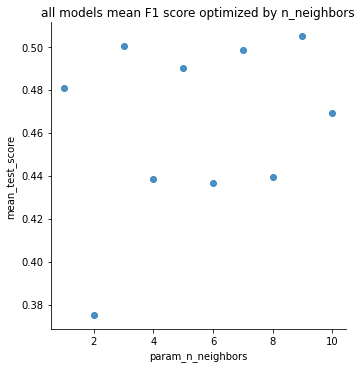

In [34]:
# 1. Using matplotlib and the GridSearchCV results dataframe plot the results of the grid search
  # 1. The x axis should be the neighbors for each cross validation.
      #The y axis should be the f1 score (mean_test_score)
  # 2. Make sure to label your plot on each axis and a title

sns.lmplot('param_n_neighbors', 'mean_test_score', data=result_df , fit_reg=False)
plt.title("all models mean F1 score optimized by n_neighbors")
plt.show()

In [35]:
# 2. Show 15 rows of the dataframe sorted by the mean_test_score
result_df[['param_n_neighbors','mean_test_score']].sort_values(by='mean_test_score',ascending=False).head(10)

,param_n_neighbors,mean_test_score
9,9,0.504838
3,3,0.500499
7,7,0.498635
5,5,0.489991
1,1,0.480888
10,10,0.469004
8,8,0.439394
4,4,0.438596
6,6,0.436518
2,2,0.375148


3 - In a text block explain which models were found to achieve the highest f1 score.

  1 - What were the top 5 nearest neighbor values that achieve the best results?

The models that were found to achieve the highest mean_test_score f1 score in order are model 9, model 3, model 7, and model 5 and so on. The highest overall mean_test_score for f1 scores was 0.504838 with model 9.

The top 5 nearest neighbors values that achieve the best results are 9, 3, 7, 5, and 1. It's interesting to see that 9 was the best but also in the top 5 is 1 nearest neighbor's value. It's not just the high param_n_neighbors values but it is pretty balanced.

# Task 5

In [37]:
# Render A8_Gardner_Tyler.ipynb to an HTML output file.  
!cp "/content/drive/MyDrive/Colab Notebooks/A8_Gardner_Tyler.ipynb" ./

!jupyter nbconvert --to html "A8_Gardner_Tyler.ipynb"

[NbConvertApp] Converting notebook A8_Gardner_Tyler.ipynb to html
[NbConvertApp] Writing 352077 bytes to A8_Gardner_Tyler.html
